# Radial velocity of a star using its S1D spectre

The spectre of the star *** was obtained by ESA's ESPRESSO telescope. An array of lines with the biggest contrast for a G9 star filter was chosen and along with the previously refered spectre was used in ARES program to obtain the gaussian functions wich best suited each line. This way, the arrays ori_lambda and lambda_fit bellow refer to the wavelenghts obtained from the filter and the means of the gaussian functions provided by ARES, respectively.

In [1]:
import numpy as np
from numpy import loadtxt
import scipy.constants as cnt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10 , 5)

data = loadtxt('test_espresso.ares' , float) # loads the file with the data
lines = loadtxt('lines_data.txt' , float) # loads the file with the line data
ori_lambda = lines[2:] # array with the reference values of the wavelength
lambda_fit = data[:,8] # an array with the fitted values of the wavelength
error = data[:,9] # an array with the error of the fitted values of the wavelength

ARES was given 229 lines to fit and found 224. The bellow code selects 224 lines to be used from the array ori_lambda, that can be found in the array lambda_ref.

In [2]:
# this lines identify the lines that should be used from the original line data
distances = np.abs(ori_lambda[:, np.newaxis] - data[:,0])
closest_indices = np.argmin(distances, axis=0)
lambda_ref = ori_lambda[closest_indices]

ARES makes a first estimate of the radial velocity and uses that value to make a correction to the spectre. The value of RV used by ARES was -16.600000 km/s. In this regard, we must take into consideration that the bellow RV is already corrected by that value.

In [3]:
RV = (lambda_fit - lambda_ref) / lambda_ref * cnt.c # RV calculation
uncert = error / lambda_ref *cnt.c

The bellow graphic shows the obtained values for the radial velocities. It is easy to notice the presence of some outliers. The mean ($\mu$), standard deviation ($\sigma$) and median of the values is also presented. Actually, the standard deviation is a large number, so the outliers were successivly removed until the standard deviation was adequate. All the values outside of $[\mu - \sigma , \mu + \sigma]$ were removed and new values for $\mu$, $\sigma$ and median were calculated. Weighted means and standard deviations were also calculated.

mean = -123.47488 m/s ; standard deviation / √N = 49.47538 m/s
weighted mean = -150.54954 m/s ; weighted standard deviation / √N = 54.18084 m/s
median = -51.93254 m/s


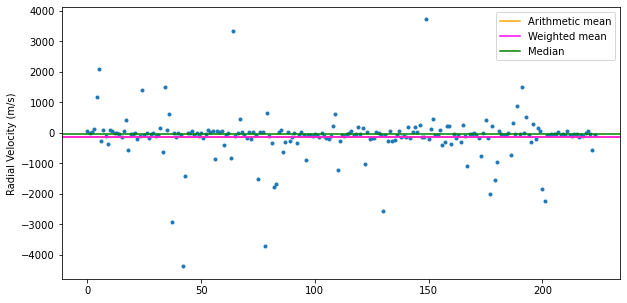

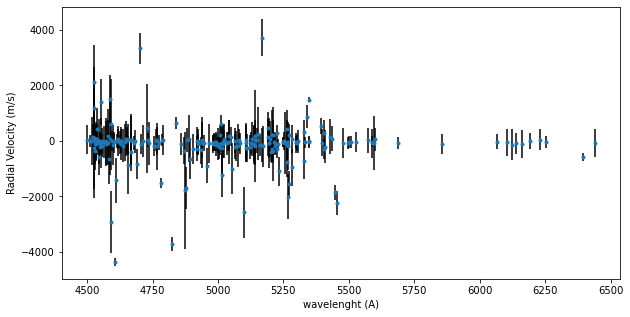

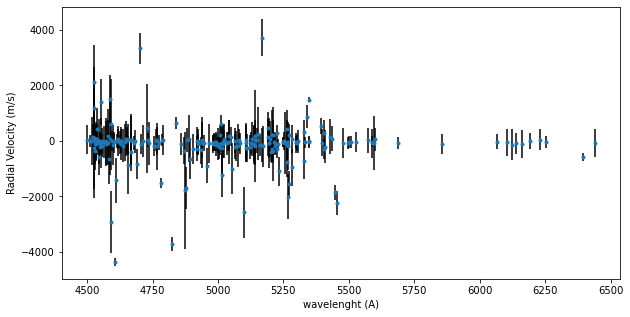

In [4]:
std = np.std(RV) # standard deviation of the values of the RVs
mean = np.mean(RV) # mean of the values of the RVs
wmean = np.average(RV, weights = 1 / uncert) # weighted mean of the values of the RVs
wstd = np.sqrt(np.average((RV - wmean) ** 2, weights = 1 / uncert)) # weighted standard deviation of the values of the RVs
median = np.median(RV) # median of the values of the RVs

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median))

plt.plot(RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(median, label= 'Median', color ='green')
plt.legend()
plt.show()

plt.errorbar(lambda_ref,RV,yerr=uncert,ecolor='black',fmt='.')
plt.ylabel('Radial Velocity (m/s)')
plt.xlabel('wavelenght (A)')
plt.show()

plt.errorbar(lambda_ref,RV,yerr=uncert,ecolor='black',fmt='.')
plt.ylabel('Radial Velocity (m/s)')
plt.xlabel('wavelenght (A)')
plt.show()

Now we add the RV value calculated by ARES.

mean = -16723.47488 m/s ; standard deviation / √N = 49.47538 m/s
weighted mean = -16750.54954 m/s ; weighted standard deviation / √N = 54.18084 m/s
median = -16651.93254 m/s


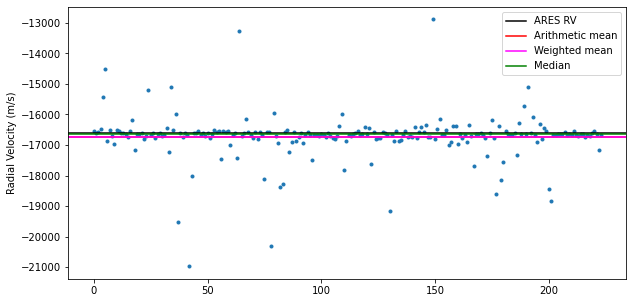

In [5]:
ARES_RV = -16600

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean + ARES_RV,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean + ARES_RV,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median + ARES_RV))

plt.plot(RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(mean + ARES_RV, label= 'Arithmetic mean', color ='red')
plt.axhline(wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

Removing outliers:

mean = -52.06893 m/s ; standard deviation / √N = 14.37530 m/s
weighted mean = -55.28393 m/s ; weighted standard deviation / √N = 13.23288 m/s
median = -43.34339 m/s


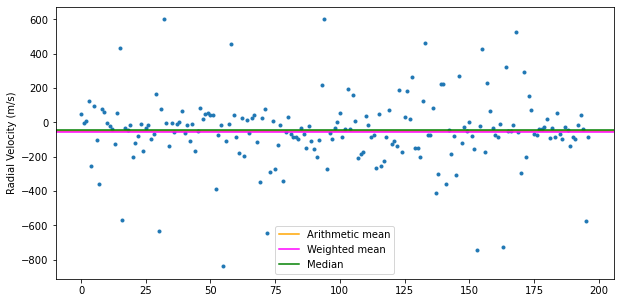

In [8]:
corrRV = np.zeros(0)
corr_uncert = np.zeros(0)

for i , rv in enumerate(RV): # this cycle chooses the values between the mean and standard deviation
    if mean - std < rv < mean + std:
        corrRV = np.append(corrRV,rv)
        corr_uncert = np.append(corr_uncert,uncert[i])
        
corr_mean = np.mean(corrRV)
corr_std = np.std(corrRV)
corr_wmean = np.average(corrRV, weights = 1 / corr_uncert)
corr_wstd = np.sqrt(np.average((corrRV - corr_wmean) ** 2, weights = 1 / corr_uncert))
corr_median = np.median(corrRV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median))

plt.plot(corrRV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median, label= 'Median', color ='green')
plt.legend()
plt.show()

mean = -16652.06893 m/s ; standard deviation / √N = 14.37530 m/s
weighted mean = -16655.28393 m/s ; weighted standard deviation / √N = 13.23288 m/s
median = -16643.34339 m/s


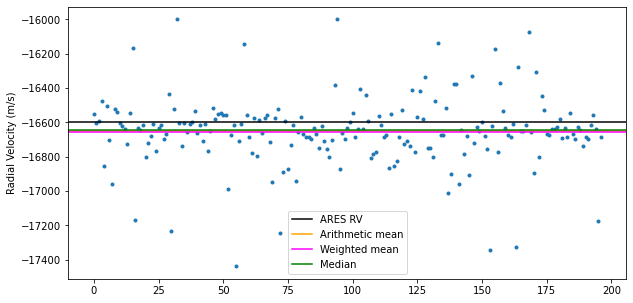

In [9]:
print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean + ARES_RV,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean + ARES_RV,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median + ARES_RV))

plt.plot(corrRV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(corr_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

Removing outliers (2):

mean = -47.93292 m/s ; standard deviation / √N = 6.21307 m/s
weighted mean = -47.98246 m/s ; weighted standard deviation / √N = 5.67971 m/s
median = -42.87077 m/s


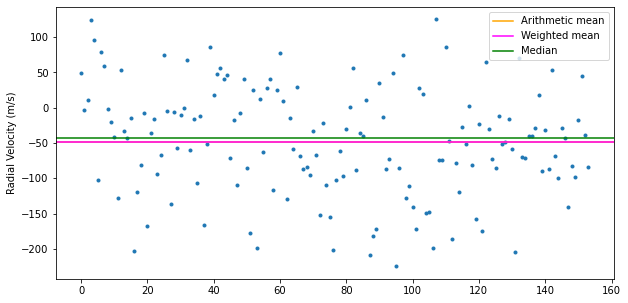

In [10]:
corr2RV = np.zeros(0)
corr2_uncert = np.zeros(0)

for i , rv in enumerate(corrRV): # this cycle chooses the values between the mean and standard deviation
    if corr_mean - corr_std < rv < corr_mean + corr_std:
        corr2RV = np.append(corr2RV,rv)
        corr2_uncert = np.append(corr2_uncert,corr_uncert[i])
        
corr2_mean = np.mean(corr2RV)
corr2_std = np.std(corr2RV)
corr2_wmean = np.average(corr2RV, weights = 1 / corr2_uncert)
corr2_wstd = np.sqrt(np.average((corr2RV - corr2_wmean) ** 2, weights = 1 / corr2_uncert))
corr2_median = np.median(corr2RV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median))

plt.plot(corr2RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr2_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median, label= 'Median', color ='green')
plt.legend()
plt.show()

mean = -16647.93292 m/s ; standard deviation / √N = 6.21307 m/s
weighted mean = -16647.98246 m/s ; weighted standard deviation / √N = 5.67971 m/s
median = -16642.87077 m/s


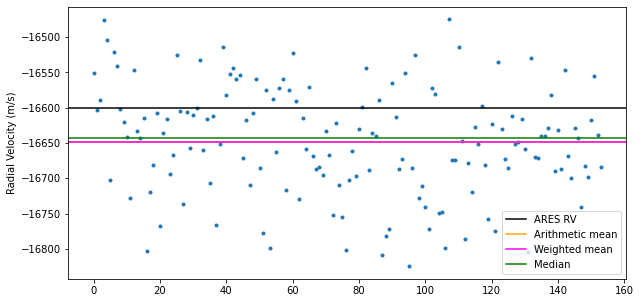

In [11]:
print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean + ARES_RV,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean + ARES_RV,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median + ARES_RV))

plt.plot(corr2RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(corr2_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

As we can see, while the median didn't change much, the mean did. The last two values of the mean and the median are actually close. If we use more wavelenghts the statistics can improve. We can also notice that the weighted mean does not appear to be very different from the arithmetic mean, but we should test it for larger samples.